<a href="https://colab.research.google.com/github/manthilaw/Python-Projects/blob/main/DataCamp_Data_Manipulation_with_pandas_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Data Manipulation with Pandas

pandas is the world's most popular Python library, used for everything from data manipulation to data analysis. In this course, you'll learn how to manipulate DataFrames, as you extract, filter, and transform real-world datasets for analysis. Using pandas you’ll explore all the core data science concepts. Using real-world data, including Walmart sales figures and global temperature time series, you’ll learn how to import, clean, calculate statistics, and create visualizations—using pandas to add to the power of Python!



In [1]:
# Mount Google Drive to Collaboratory

from google.colab import drive
drive.mount('/content/gdrive')


# Mount Google Drive to Collaboratory

path = ('/content/gdrive/MyDrive/DataCamp CSV/Data Manupilation with Pandas/homelessness.csv')

# Import Pandas

import pandas as pd

# Read CSV file

homelessness = pd.read_csv(path)

Mounted at /content/gdrive


## 1. Transforming DataFrames

Inspecting a DataFrame
When you get a new DataFrame to work with, the first thing you need to do is explore it and see what it contains. There are several useful methods and attributes for this.

* head() returns the first few rows (the “head” of the DataFrame).
* info() shows information on each of the columns, such as the data type and number of missing values.
* shape returns the number of rows and columns of the DataFrame.
* describe() calculates a few summary statistics for each column.



homelessness is a DataFrame containing estimates of homelessness in each U.S. state in 2018. The individual column is the number of homeless individuals not part of a family with children. The family_members column is the number of homeless individuals part of a family with children. The state_pop column is the state's total population.

pandas is imported for you.


In [2]:
# Print the head of the homelessness data
print(homelessness.head())

   Unnamed: 0              region       state  individuals  family_members  \
0           0  East South Central     Alabama       2570.0           864.0   
1           1             Pacific      Alaska       1434.0           582.0   
2           2            Mountain     Arizona       7259.0          2606.0   
3           3  West South Central    Arkansas       2280.0           432.0   
4           4             Pacific  California     109008.0         20964.0   

   state_pop  
0    4887681  
1     735139  
2    7158024  
3    3009733  
4   39461588  


In [3]:
# Print information about homelessness
print(homelessness.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      51 non-null     int64  
 1   region          51 non-null     object 
 2   state           51 non-null     object 
 3   individuals     51 non-null     float64
 4   family_members  51 non-null     float64
 5   state_pop       51 non-null     int64  
dtypes: float64(2), int64(2), object(2)
memory usage: 2.5+ KB
None


In [4]:
# Print the shape of homelessness
print(homelessness.shape)

(51, 6)


In [5]:
# Print a description of homelessness
print(homelessness.describe())

       Unnamed: 0    individuals  family_members     state_pop
count   51.000000      51.000000       51.000000  5.100000e+01
mean    25.000000    7225.784314     3504.882353  6.405637e+06
std     14.866069   15991.025083     7805.411811  7.327258e+06
min      0.000000     434.000000       75.000000  5.776010e+05
25%     12.500000    1446.500000      592.000000  1.777414e+06
50%     25.000000    3082.000000     1482.000000  4.461153e+06
75%     37.500000    6781.500000     3196.000000  7.340946e+06
max     50.000000  109008.000000    52070.000000  3.946159e+07


## 1.2 Parts of a DataFrame
To better understand DataFrame objects, it's useful to know that they consist of three components, stored as attributes:

.values: A two-dimensional NumPy array of values.
.columns: An index of columns: the column names.
.index: An index for the rows: either row numbers or row names.
You can usually think of indexes as a list of strings or numbers, though the pandas Index data type allows for more sophisticated options. (These will be covered later in the course.)

homelessness is available.

* Import pandas using the alias pd.
* Print a 2D NumPy array of the values in homelessness.
* Print the column names of homelessness.
* Print the index of homelessness.

In [6]:
# Print the values of homelessness
print(homelessness.values)

[[0 'East South Central' 'Alabama' 2570.0 864.0 4887681]
 [1 'Pacific' 'Alaska' 1434.0 582.0 735139]
 [2 'Mountain' 'Arizona' 7259.0 2606.0 7158024]
 [3 'West South Central' 'Arkansas' 2280.0 432.0 3009733]
 [4 'Pacific' 'California' 109008.0 20964.0 39461588]
 [5 'Mountain' 'Colorado' 7607.0 3250.0 5691287]
 [6 'New England' 'Connecticut' 2280.0 1696.0 3571520]
 [7 'South Atlantic' 'Delaware' 708.0 374.0 965479]
 [8 'South Atlantic' 'District of Columbia' 3770.0 3134.0 701547]
 [9 'South Atlantic' 'Florida' 21443.0 9587.0 21244317]
 [10 'South Atlantic' 'Georgia' 6943.0 2556.0 10511131]
 [11 'Pacific' 'Hawaii' 4131.0 2399.0 1420593]
 [12 'Mountain' 'Idaho' 1297.0 715.0 1750536]
 [13 'East North Central' 'Illinois' 6752.0 3891.0 12723071]
 [14 'East North Central' 'Indiana' 3776.0 1482.0 6695497]
 [15 'West North Central' 'Iowa' 1711.0 1038.0 3148618]
 [16 'West North Central' 'Kansas' 1443.0 773.0 2911359]
 [17 'East South Central' 'Kentucky' 2735.0 953.0 4461153]
 [18 'West South Cen

In [7]:
# Print the column index of homelessness
print(homelessness.columns)

Index(['Unnamed: 0', 'region', 'state', 'individuals', 'family_members',
       'state_pop'],
      dtype='object')


In [8]:
# Print the row index of homelessness
print(homelessness.index)

RangeIndex(start=0, stop=51, step=1)


# 1.3 Sorting rows
Finding interesting bits of data in a DataFrame is often easier if you change the order of the rows. You can sort the rows by passing a column name to .sort_values().

In cases where rows have the same value (this is common if you sort on a categorical variable), you may wish to break the ties by sorting on another column. You can sort on multiple columns in this way by passing a list of column names.



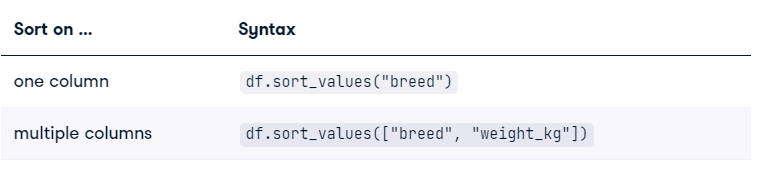

homelessness is available and pandas is loaded as pd.

Sort homelessness by the number of homeless individuals, from smallest to largest, and save this as homelessness_ind.
Print the head of the sorted DataFrame.

In [14]:
# Sort homelessness by individuals
homelessness_ind = homelessness.sort_values("individuals")

print(homelessness_ind.head())



    Unnamed: 0              region         state  individuals  family_members  \
50          50            Mountain       Wyoming        434.0           205.0   
34          34  West North Central  North Dakota        467.0            75.0   
7            7      South Atlantic      Delaware        708.0           374.0   
39          39         New England  Rhode Island        747.0           354.0   
45          45         New England       Vermont        780.0           511.0   

    state_pop  
50     577601  
34     758080  
7      965479  
39    1058287  
45     624358  


Sort homelessness by the number of homeless family_members in descending order, and save this as homelessness_fam.
Print the head of the sorted DataFrame.

In [10]:
# Sort homelessness by descending family members
homelessness_fam = homelessness.sort_values('family_members',ascending = False)

# Print the top few rows
print(homelessness_fam.head())


    Unnamed: 0              region          state  individuals  \
32          32        Mid-Atlantic       New York      39827.0   
4            4             Pacific     California     109008.0   
21          21         New England  Massachusetts       6811.0   
9            9      South Atlantic        Florida      21443.0   
43          43  West South Central          Texas      19199.0   

    family_members  state_pop  
32         52070.0   19530351  
4          20964.0   39461588  
21         13257.0    6882635  
9           9587.0   21244317  
43          6111.0   28628666  


Sort homelessness first by region (ascending), and then by number of family members (descending). Save this as homelessness_reg_fam.
Print the head of the sorted DataFrame.

In [16]:
# Sort homelessness by region, then descending family members
homelessness_reg_fam = homelessness.sort_values(["region","family_members"], ascending=[True,False])

# Print the top few rows
print(homelessness_reg_fam.head())

    Unnamed: 0              region      state  individuals  family_members  \
13          13  East North Central   Illinois       6752.0          3891.0   
35          35  East North Central       Ohio       6929.0          3320.0   
22          22  East North Central   Michigan       5209.0          3142.0   
49          49  East North Central  Wisconsin       2740.0          2167.0   
14          14  East North Central    Indiana       3776.0          1482.0   

    state_pop  
13   12723071  
35   11676341  
22    9984072  
49    5807406  
14    6695497  


# 1.4 Subsetting columns
When working with data, you may not need all of the variables in your dataset. Square brackets ([]) can be used to select only the columns that matter to you in an order that makes sense to you. To select only "col_a" of the DataFrame df, use

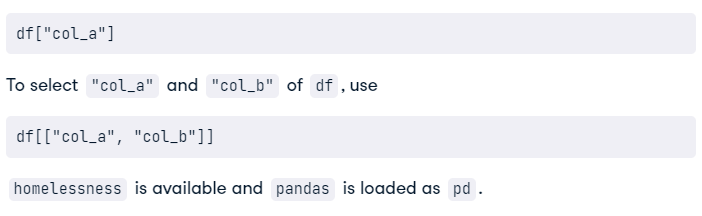

Create a DataFrame called individuals that contains only the individuals column of homelessness.
Print the head of the result.

In [12]:
# Select the individuals column
individuals = homelessness['individuals']

# Print the head of the result
print(individuals.head())

0      2570.0
1      1434.0
2      7259.0
3      2280.0
4    109008.0
Name: individuals, dtype: float64


Create a DataFrame called state_fam that contains only the state and family_members columns of homelessness, in that order.
Print the head of the result.

In [13]:
state_fam = homelessness[['family_members','state']]

print(state_fam.head())

   family_members       state
0           864.0     Alabama
1           582.0      Alaska
2          2606.0     Arizona
3           432.0    Arkansas
4         20964.0  California


Create a DataFrame called ind_state that contains the individuals and state columns of homelessness, in that order.
Print the head of the result.

In [17]:
# Select only the individuals and state columns, in that order
ind_state = homelessness[['individuals','state']]

print(ind_state.head())

   individuals       state
0       2570.0     Alabama
1       1434.0      Alaska
2       7259.0     Arizona
3       2280.0    Arkansas
4     109008.0  California


## 1.5 Subsetting rows
A large part of data science is about finding which bits of your dataset are interesting. One of the simplest techniques for this is to find a subset of rows that match some criteria. This is sometimes known as filtering rows or selecting rows.

There are many ways to subset a DataFrame, perhaps the most common is to use relational operators to return True or False for each row, then pass that inside square brackets.

> dogs[dogs["height_cm"] > 60]

> dogs[dogs["color"] == "tan"]

You can filter for multiple conditions at once by using the "bitwise and" operator, &

> dogs[(dogs["height_cm"] > 60) & (dogs["color"] == "tan")]







Filter homelessness for cases where the number of individuals is greater than ten thousand, assigning to ind_gt_10k. View the printed result.

In [19]:
# Filter for rows where individuals is greater than 10000
ind_gt_10k = homelessness[homelessness['individuals']>10000]

print(ind_gt_10k)

    Unnamed: 0              region       state  individuals  family_members  \
4            4             Pacific  California     109008.0         20964.0   
9            9      South Atlantic     Florida      21443.0          9587.0   
32          32        Mid-Atlantic    New York      39827.0         52070.0   
37          37             Pacific      Oregon      11139.0          3337.0   
43          43  West South Central       Texas      19199.0          6111.0   
47          47             Pacific  Washington      16424.0          5880.0   

    state_pop  
4    39461588  
9    21244317  
32   19530351  
37    4181886  
43   28628666  
47    7523869  


Filter homelessness for cases where the USA Census region is "Mountain", assigning to mountain_reg. View the printed result.

In [20]:
# Filter for rows where region is Mountain
mountain_reg = homelessness[homelessness['region']=='Mountain']

print(mountain_reg)

    Unnamed: 0    region       state  individuals  family_members  state_pop
2            2  Mountain     Arizona       7259.0          2606.0    7158024
5            5  Mountain    Colorado       7607.0          3250.0    5691287
12          12  Mountain       Idaho       1297.0           715.0    1750536
26          26  Mountain     Montana        983.0           422.0    1060665
28          28  Mountain      Nevada       7058.0           486.0    3027341
31          31  Mountain  New Mexico       1949.0           602.0    2092741
44          44  Mountain        Utah       1904.0           972.0    3153550
50          50  Mountain     Wyoming        434.0           205.0     577601


Filter homelessness for cases where the number of family_members is less than one thousand and the region is "Pacific", assigning to fam_lt_1k_pac. View the printed result.

In [21]:
# Filter for rows where family_members is less than 1000
# and region is Pacific
fam_lt_1k_pac = homelessness[(homelessness['family_members']<1000) & (homelessness['region'] == 'Pacific')]

print(fam_lt_1k_pac)

   Unnamed: 0   region   state  individuals  family_members  state_pop
1           1  Pacific  Alaska       1434.0           582.0     735139


## 1.6 Subsetting rows by categorical variables
Subsetting data based on a categorical variable often involves using the "or" operator (|) to select rows from multiple categories. This can get tedious when you want all states in one of three different regions, for example. Instead, use the .isin() method, which will allow you to tackle this problem by writing one condition instead of three separate ones.

>colors = ["brown", "black", "tan"]

>condition = dogs["color"].isin(colors)

>dogs[condition]

homelessness is available and pandas is loaded as pd.

Filter homelessness for cases where the USA census region is "South Atlantic" or it is "Mid-Atlantic", assigning to south_mid_atlantic. View the printed result.

In [22]:
south_mid_atlantic = homelessness[(homelessness['region']=='South Atlantic') | (homelessness['region'] =='"Mid-Atlantic')]

print(south_mid_atlantic)

    Unnamed: 0          region                 state  individuals  \
7            7  South Atlantic              Delaware        708.0   
8            8  South Atlantic  District of Columbia       3770.0   
9            9  South Atlantic               Florida      21443.0   
10          10  South Atlantic               Georgia       6943.0   
20          20  South Atlantic              Maryland       4914.0   
33          33  South Atlantic        North Carolina       6451.0   
40          40  South Atlantic        South Carolina       3082.0   
46          46  South Atlantic              Virginia       3928.0   
48          48  South Atlantic         West Virginia       1021.0   

    family_members  state_pop  
7            374.0     965479  
8           3134.0     701547  
9           9587.0   21244317  
10          2556.0   10511131  
20          2230.0    6035802  
33          2817.0   10381615  
40           851.0    5084156  
46          2047.0    8501286  
48           222.0   

Filter homelessness for cases where the USA census state is in the list of Mojave states, canu, assigning to mojave_homelessness. View the printed result.

In [24]:
# The Mojave Desert states
canu = ["California", "Arizona", "Nevada", "Utah"]

# Filter for rows in the Mojave Desert states
mojave_homelessness = homelessness[homelessness['state'].isin(canu)]

print(mojave_homelessness)

    Unnamed: 0    region       state  individuals  family_members  state_pop
2            2  Mountain     Arizona       7259.0          2606.0    7158024
4            4   Pacific  California     109008.0         20964.0   39461588
28          28  Mountain      Nevada       7058.0           486.0    3027341
44          44  Mountain        Utah       1904.0           972.0    3153550


## 1.7 Adding new columns
You aren't stuck with just the data you are given. Instead, you can add new columns to a DataFrame. This has many names, such as transforming, mutating, and feature engineering.

You can create new columns from scratch, but it is also common to derive them from other columns, for example, by adding columns together or by changing their units.

homelessness is available and pandas is loaded as pd.

* Add a new column to homelessness, named total, containing the sum of the individuals and family_members columns.
* Add another column to homelessness, named p_individuals, containing the proportion of homeless people in each state who are individuals.


In [26]:
# Add total col as sum of individuals and family_members
homelessness['total'] = homelessness['individuals']+homelessness['family_members']

# Add p_individuals col as proportion of total that are individuals
homelessness['p_individuals'] = homelessness['individuals']/homelessness['total']

# See the result
print(homelessness)

    Unnamed: 0              region                 state  individuals  \
0            0  East South Central               Alabama       2570.0   
1            1             Pacific                Alaska       1434.0   
2            2            Mountain               Arizona       7259.0   
3            3  West South Central              Arkansas       2280.0   
4            4             Pacific            California     109008.0   
5            5            Mountain              Colorado       7607.0   
6            6         New England           Connecticut       2280.0   
7            7      South Atlantic              Delaware        708.0   
8            8      South Atlantic  District of Columbia       3770.0   
9            9      South Atlantic               Florida      21443.0   
10          10      South Atlantic               Georgia       6943.0   
11          11             Pacific                Hawaii       4131.0   
12          12            Mountain                 

## 1.8 Combo-attack!
You've seen the four most common types of data manipulation: sorting rows, subsetting columns, subsetting rows, and adding new columns. In a real-life data analysis, you can mix and match these four manipulations to answer a multitude of questions.

In this exercise, you'll answer the question, "Which state has the highest number of homeless individuals per 10,000 people in the state?" Combine your new pandas skills to find out.

* Add a column to homelessness, indiv_per_10k, containing the number of homeless individuals per ten thousand people in each state.
* Subset rows where indiv_per_10k is higher than 20, assigning to high_homelessness.
* Sort high_homelessness by descending indiv_per_10k, assigning to high_homelessness_srt.
* Select only the state and indiv_per_10k columns of high_homelessness_srt and save as result. Look at the result.

In [30]:
# Create indiv_per_10k col as homeless individuals per 10k state pop
homelessness['indiv_per_10k'] = 10000 * homelessness['individuals'] /homelessness['state_pop']

# Subset rows for indiv_per_10k greater than 20
high_homelessness = homelessness[homelessness['indiv_per_10k'] > 20]

# Sort high_homelessness by descending indiv_per_10k
high_homelessness_srt = high_homelessness.sort_values('indiv_per_10k',ascending = False)

# From high_homelessness_srt, select the state and indiv_per_10k cols
results = high_homelessness_srt[['state','indiv_per_10k']]

print(results)


                   state  indiv_per_10k
8   District of Columbia      53.738381
11                Hawaii      29.079406
4             California      27.623825
37                Oregon      26.636307
28                Nevada      23.314189
47            Washington      21.829195
32              New York      20.392363
